In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage , AnnotationBbox
import cv2
import extcolors
from colormap import rgb2hex


C:\Users\PVI\AppData\Local\Temp\ipykernel_15264\265539057.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


(-0.5, 899.5, 674.5, -0.5)

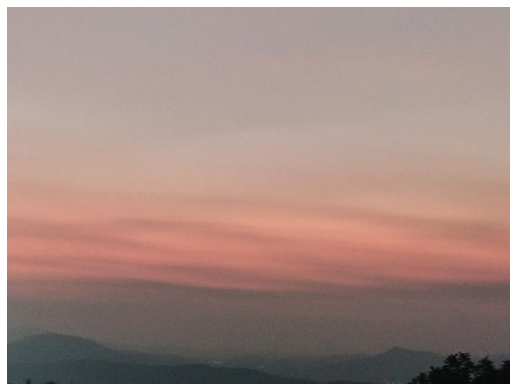

In [2]:
# 导入模块并加载图片并调整图像大小
input_name = 'test_1.jpg'
output_width = 900   
# 给定一个基本宽度大小    #set the output size
img = Image.open(input_name)
# 打开并标识图像文件
wpercent = (output_width/float(img.size[0]))
# 基本宽度与原图的比例
hsize = int((float(img.size[1])*float(wpercent)))
# 计算比例不变的条件下新图的长度
img = img.resize((output_width,hsize), Image.ANTIALIAS)
#  重新设置大小 默认情况下PIL使用Image。NEAREST 过滤器进行大小调整，从而获得良好的性能，但质量很差

#save
resize_name = 'resize_' + input_name  #the resized image name
img.save(resize_name)                 #output location can be specified before resize_name
 
#read
plt.figure(figsize=(9, 9))
img_url = resize_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')



In [3]:
colors_x = extcolors.extract_from_path(img_url,tolerance=12,limit=12)
# 使用extcolors库提取颜色 
# limit=12 限制提取的颜色数量 tolerance=12公差值为12
colors_x

([((180, 163, 156), 294425),
  ((100, 89, 87), 115497),
  ((204, 155, 140), 93303),
  ((205, 133, 118), 38940),
  ((58, 63, 66), 35074),
  ((157, 106, 102), 24199),
  ((9, 11, 10), 5977),
  ((136, 115, 112), 39),
  ((29, 88, 60), 18),
  ((25, 39, 40), 13),
  ((71, 91, 82), 10),
  ((36, 60, 46), 3)],
 607500)

In [7]:
# 使用rgb2hex库定义一个函数以将RGB代码转换为HEX颜色代码并创建一个DataFrame
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    # convert RGB toHEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),int(i.split(", ")[1]),int(i.split(", ")[2].replace(")",""))) for i in df_rgb]

    df = pd.DataFrame(zip(df_color_up,df_percent),columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color  

                   
   

,c_code,occurence
0,#B4A39C,294425
1,#645957,115497
2,#CC9B8C,93303
3,#CD8576,38940
4,#3A3F42,35074
5,#9D6A66,24199
6,#090B0A,5977
7,#887370,39
8,#1D583C,18
9,#192728,13


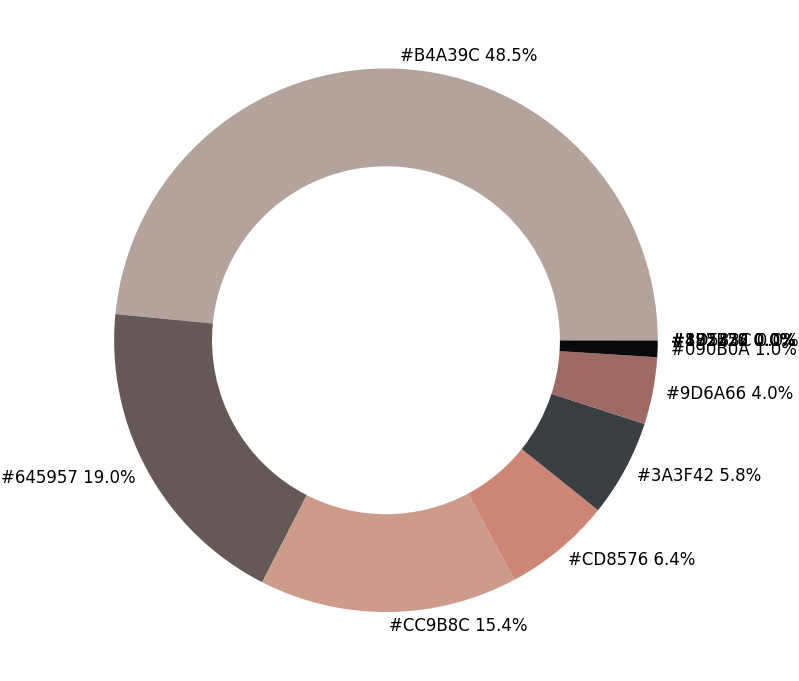

In [8]:

list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)
 
#create space in the center
plt.setp(wedges, width=0.36)
 
ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()





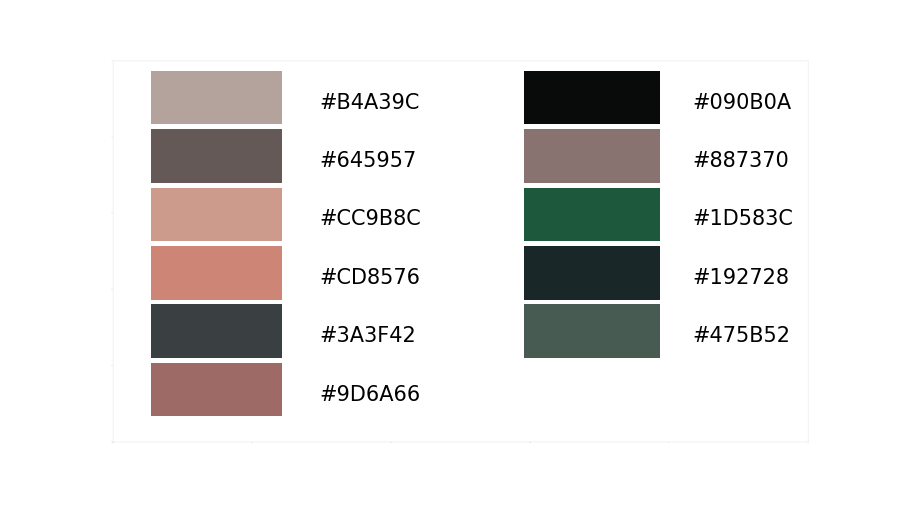

In [12]:
#create background color 
fig,ax = plt.subplots(figsize=(192,108),dpi=10)
fig.set_facecolor('white')
plt.savefig('bg.png')
plt.close(fig)

# create color palette
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90,90),dpi =10)
ax = fig.add_subplot(1,1,1)

x_posi ,y_posi , y_posi2 = 320,25,25
for c in list_color:
    if list_color.index(c) <=5:
        y_posi += 125
        rect = patches.Rectangle((x_posi,y_posi),280,115,facecolor =c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360,y=y_posi+80,s=c,fontdict={'fontsize':150})
    else:
        y_posi2 +=125
        rect = patches.Rectangle((x_posi +800 ,y_posi2),290,115,facecolor = c )
        ax.add_artist(rect)
        ax.text(x = x_posi+1160,y=y_posi2+80,s=c,fontdict={'fontsize':150})
        
ax.axis('off')
plt.imshow(bg)
plt.tight_layout()